# Data Extraction from Adjurna API

We choose following parameters for our work on [Adjurna API](https://developer.adzuna.com/activedocs#!/adzuna/search):
- **Country:** Germany (de)
- **app_id:** For security reason, I keep the `app_id` and `app_key` into the `.env` as `APP_ID` and `APP_KEY`.
- **Page:** 100
- **results_per_page:** 20
- **what:** Data Science

We keep other setting default. The APIs can be requested using 
- **Request URL:** https://api.adzuna.com/v1/api/jobs/de/search/100?app_id=your_app_id&app_key=your_app_key&results_per_page=20&what=Data%20Science (here provide `app_id` and the `app_key`)
- **cURL:** <pre>curl -v -X GET "https://api.adzuna.com/v1/api/jobs/de/search/100?app_id=your_app_id&app_key=your_app_key&results_per_page=20&what=Data%20Science"</pre>
- **Response body:** The part of the json response is as follows:
  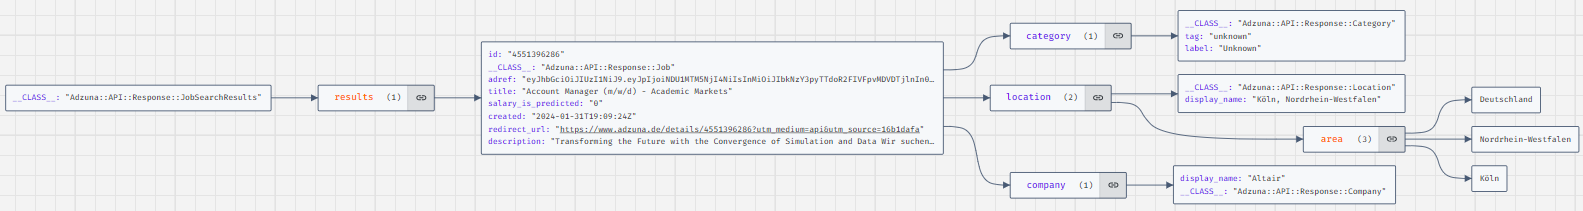

- **Response Code:** 200
- **Response Headers:**
  <pre>
  {
    "access-control-allow-headers": "Origin, X-Requested-With, Content-Type, Accept",
    "access-control-allow-origin": "*",
    "connection": "keep-alive",
    "content-length": "26472",
    "content-type": "application/json; charset=utf8",
    "date": "Thu, 15 Feb 2024 19:40:56 GMT",
    "server": "openresty",
    "vary": "Content-Type",
    "x-catalyst": "5.90130",
    "x-envoy-upstream-service-time": "1134"
    }
  </pre>

## 1. Scrapping data from the first page only

In [1]:
### Importing libraries
import urllib.request
import robotexclusionrulesparser
from bs4 import BeautifulSoup
import requests
import time
import random

import csv
import dateutil.parser as dateparser
import os
import datetime
import pandas as pd
from dotenv import load_dotenv

In [2]:
# Load environment variables from .env file
load_dotenv()
# Access the API key from the environment
api_key = os.getenv("API_KEY2")
app_id=os.environ['APP_ID']

# Define the headers with the API key
headers = {'Authorization': api_key}

In [3]:
app_id = app_id
app_key = api_key

https://api.adzuna.com/v1/api/jobs/de/search/100?app_id=16b1dafa&app_key=api_key&results_per_page=20&what=Data%20Science

In [49]:
import requests

# Define the API endpoint and parameters
adjurna_url = 'https://api.adzuna.com/v1/api/jobs/de/search/1?app_id=app_id&app_key=api_key&results_per_page=20&what=Data%20Science&content-type=application/json'
params = {
    "app_id": app_id,
    "app_key": api_key
}

# Make the GET request
response = requests.get(adjurna_url, params=params)

# Extracting data from JSON response
data = response.json()['results']

# Extract the required information into lists
titles = [job['title'] for job in data]
companies = [job['company']['display_name'] for job in data]
locations = [job['location']['display_name'] for job in data]
categories = [job['category']['label'] for job in data]
tags = [job['category']['tag'] for job in data]
created = [job['created'] for job in data]
redirect_urls = [job['redirect_url'] for job in data]
descriptions = [job['description'] for job in data]

# Create a DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Company': companies,
    'Location': locations,
    'Category': categories,
    'Tag': tags,
    'Created': created,
    'Redirect URL': redirect_urls,
    'Description': descriptions
})

# Display the DataFrame
print(df)

                                                Title  \
0   Tandem Professur "Prozessmodellierung und Data...   
1   Studentische Hilfskraft für die IT-Systemadmin...   
2   Duales Studium Wirtschaftsinformatik Data Scie...   
3   Studentische Hilfskraft – Schulungsorganisatio...   
4                Software Architekt Data Science (gn)   
5                              Praktikum Data Science   
6               Duales Studium - Data Science (B.Sc.)   
7    PreMaster Programm - Data Science / Data Analyst   
8   Duales Studium Data Science & KI – Simulations...   
9   EY-Parthenon Consultant - Data Science - Corpo...   
10                      Data Science Graduate Program   
11                        Duales Studium Data Science   
12         Head of Data Science/Business Intelligence   
13  Dualen Studenten (m/w/d) Wirtschaftsinformatik...   
14  Duales Studium - Informatik mit Schwerpunkt Da...   
15  EY-Parthenon Associate Consultant - Data Scien...   
16  Duales Studium KI und Data 

In [50]:
df.head()

,Title,Company,Location,Category,Tag,Created,Redirect URL,Description
0,"Tandem Professur ""Prozessmodellierung und Data...",Hochschule Biberach,"Biberach an der Riß, Biberach (Kreis)",Unknown,unknown,2024-01-18T13:16:14Z,https://www.adzuna.de/land/ad/4531069586?se=lj...,Die Hochschule Biberach HBC ist eine Hochschul...
1,Studentische Hilfskraft für die IT-Systemadmin...,Fraunhofer-Institut für Intelligente Analyse- ...,"Rhein-Sieg-Kreis, Nordrhein-Westfalen",Unknown,unknown,2024-01-26T13:16:23Z,https://www.adzuna.de/land/ad/4545461280?se=lj...,Die Fraunhofer-Gesellschaft betreibt in Deutsc...
2,Duales Studium Wirtschaftsinformatik Data Scie...,HARIBO Deutschland,"Grafschaft Bentheim (Kreis), Niedersachsen",Unknown,unknown,2024-02-13T13:30:34Z,https://www.adzuna.de/land/ad/4567210300?se=lj...,"Spannender Lern-Mix, vielseitige Praxis, erfah..."
3,Studentische Hilfskraft – Schulungsorganisatio...,Fraunhofer-Institut für Intelligente Analyse- ...,"Rhein-Sieg-Kreis, Nordrhein-Westfalen",Unknown,unknown,2024-01-22T13:16:02Z,https://www.adzuna.de/land/ad/4536685426?se=lj...,Die Fraunhofer-Gesellschaft betreibt in Deutsc...
4,Software Architekt Data Science (gn),IABG Industrieanlagen - Betriebsgesellschaft mbH,Deutschland,IT-Stellen,it-jobs,2023-12-28T00:58:21Z,https://www.adzuna.de/land/ad/4498954484?se=lj...,Unser Geschäftsbereich Defence & Security ist ...


In [52]:
df['Category'].unique()

array(['Unknown', 'IT-Stellen',
       'Stellen aus Wissenschaft & Qualitätssicherung', 'Beraterstellen'],
      dtype=object)

In [53]:
# Save the DataFrame as a CSV file
df.to_csv('./data/adzuna/adjurna_jobs_data.csv', index=False)

### 2. Scrapping page wise

In [ ]:
import requests

# Define the API endpoint and parameters
adjurna_url = 'https://api.adzuna.com/v1/api/jobs/de/search/1?app_id=app_id&app_key=api_key&results_per_page=20&what=Data%20Science&content-type=application/json'
params = {
    "app_id": app_id,
    "app_key": api_key
}

# Make the GET request
response = requests.get(adjurna_url, params=params)

# Extracting data from JSON response
data = response.json()['results']

# Extract the required information into lists 
titles = [job['title'] for job in data]
companies = [job['company']['display_name'] for job in data]
locations = [job['location']['display_name'] for job in data]
categories = [job['category']['label'] for job in data]
tags = [job['category']['tag'] for job in data]
created = [job['created'] for job in data]
redirect_urls = [job['redirect_url'] for job in data]
descriptions = [job['description'] for job in data]

# Create a DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Company': companies,
    'Location': locations,
    'Category': categories,
    'Tag': tags,
    'Created': created,
    'Redirect URL': redirect_urls,
    'Description': descriptions
})

# Display the DataFrame
print(df)

# Top 100 page scrapping

In [4]:
import csv
import datetime
import os
import requests
import time
from bs4 import BeautifulSoup
import dateparser

path = "./data/adzuna/"
adzuna_filename = "adzuna_scrapped_data.csv"
adzuna_header = ["company","title","location","link","job_posted","category","source", "description"]

if not os.path.exists(path):
    os.makedirs(path)
if not os.path.isfile(path + adzuna_filename):
    with open(path + adzuna_filename, 'w', newline='') as file_handle:
        writer = csv.writer(file_handle, delimiter=',')
        writer.writerow(adzuna_header)

In [5]:
def fetchDataFromAdzuna(max_days_old=0):
    country = "de"
    APP_id = app_id
    APP_key = app_key
    what = "data science"
    where = "de"
    
    adzuna_url = "https://api.adzuna.com/v1/api/jobs/{}/search/{}?app_id={}&app_key={}&what={}&where={}&max_days_old={}"

    try:
        response = requests.get(adzuna_url.format(country, 1, APP_id, APP_key, what, where, max_days_old))
        if response.status_code == 200:
            results = response.json()
            total_jobs = results.get('count')

            with open("./data/adzuna/adzuna_scrapped_data.csv", 'a', newline='') as file_handle:
                writer = csv.writer(file_handle, delimiter=',')

                for page in range(1, total_jobs + 1):
                    response = requests.get(adzuna_url.format(country, page, APP_id, APP_key, what, where, max_days_old))
                    results = response.json()
                    if 'results' in results:
                        for result in results['results']:
                            if result.get('title'):
                                title = BeautifulSoup(result['title'], "html.parser").get_text()
                            if result.get('description'):
                                description = BeautifulSoup(result['description'], "html.parser").get_text()
                            row_values = [result['company'].get('display_name', ""),
                                        title,
                                        result['location'].get('display_name', ""),
                                        result['redirect_url'],
                                        dateparser.parse(result.get("created", "")),
                                        description,
                                        result['category'].get('label', ""),
                                        'Adzuna']

                            try:
                                writer.writerow(row_values)
                            except UnicodeEncodeError:
                                row = [item.encode('utf-8') if item and not isinstance(item, datetime.datetime) else item for
                                    item in row_values]
                                writer.writerow(row)

                        time.sleep(5)

        else:
            print(f"Failed to fetch data. Status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")


In [6]:
fetchDataFromAdzuna()

C:\Users\hp\AppData\Local\Temp\ipykernel_8940\2057913368.py:25: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  title = BeautifulSoup(result['title'], "html.parser").get_text()
C:\Users\hp\AppData\Local\Temp\ipykernel_8940\2057913368.py:27: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  description = BeautifulSoup(result['description'], "html.parser").get_text()


KeyboardInterrupt: 